Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/adult.csv' )
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Target variable

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Workclass, Occupation and Native Country have missing values. So we perform tuning on them.

In [8]:
df["native.country"] = df["native.country"].apply(str.strip).replace("?",np.nan)
liste_1 =df["native.country"]

for i in range(0,len(liste_1)):
    if pd.isnull(liste_1[i]):
        liste_1[i] = liste_1[i-1]

df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [9]:
df["occupation"] = df["occupation"].apply(str.strip).replace("?",np.nan)

liste_2 =df["occupation"]

for i in range(0,len(liste_2)):
    if pd.isnull(liste_2[i]):
        liste_2[i] = liste_2[i+1]

df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', nan, 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [10]:
df["workclass"] = df["workclass"].apply(str.strip).replace("?",np.nan)
liste_3 =df["workclass"]

for i in range(0,len(liste_3)):
    if pd.isnull(liste_3[i]):
        liste_3[i] = liste_3[i+1]

df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', nan, 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df.isna().sum(axis=0)

age                0
workclass         97
fnlwgt             0
education          0
education.num      0
marital.status     0
occupation        97
relationship       0
race               0
sex                0
capital.gain       0
capital.loss       0
hours.per.week     0
native.country     0
income             0
dtype: int64

Let's check for outliers

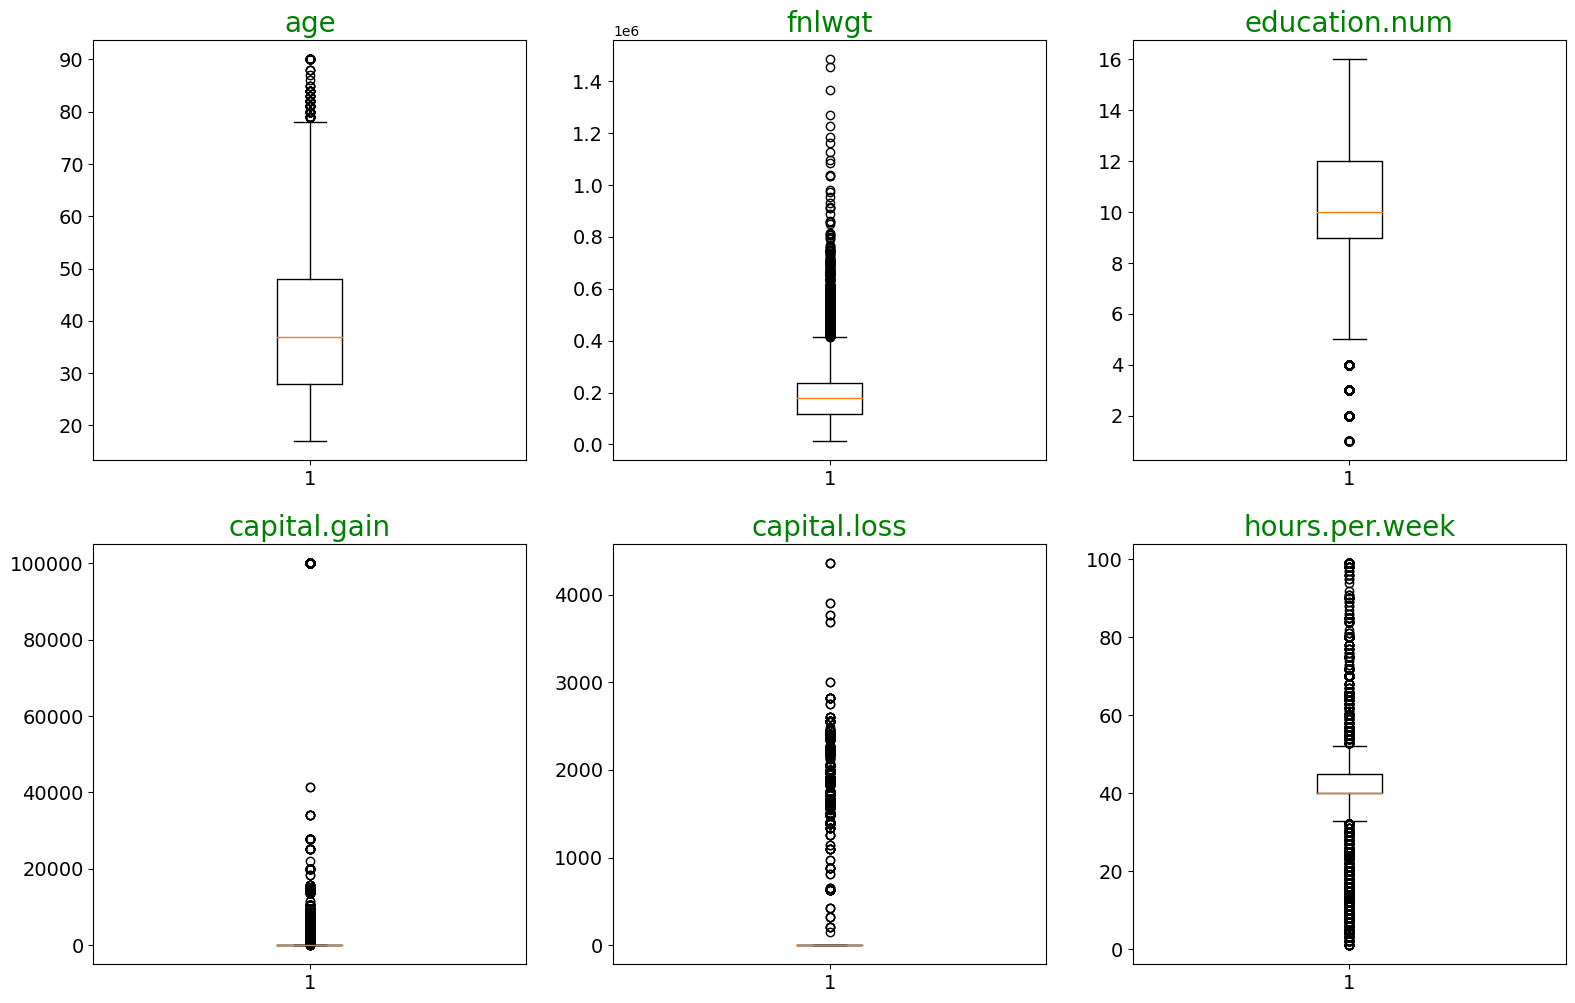

In [12]:
plt.figure(figsize=(19,12))


num_feat = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


plt.show()

In [13]:
from scipy.stats.mstats import winsorize
df["age"]           = winsorize(df["age"],(0,0.15))
df["fnlwgt"]        = winsorize(df["fnlwgt"],(0,0.15))
df["capital.gain"]  = winsorize(df["capital.gain"],(0,0.099))
df["capital.loss"]  = winsorize(df["capital.loss"],(0,0.099))
df["hours.per.week"]= winsorize(df["hours.per.week"],(0.12,0.18))

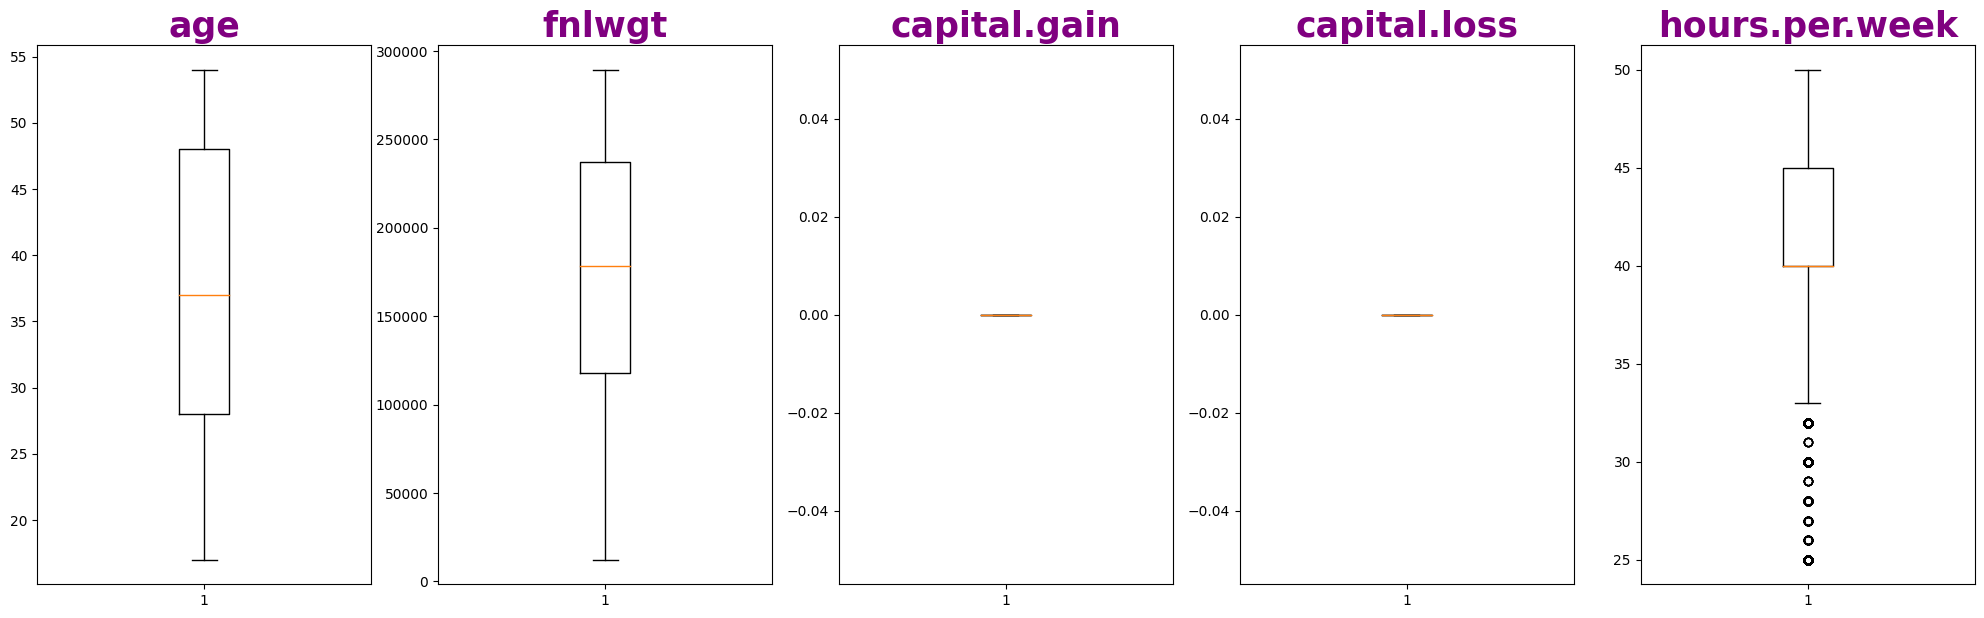

In [14]:
plt.rcParams['figure.figsize'] = (25,7)

baslik_font = {'family':'calibri','color':'purple','weight':'bold','size':25}

col_list=['age',"fnlwgt",'capital.gain', 'capital.loss', 'hours.per.week']

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.boxplot(df[col_list[i]])
    plt.title(col_list[i],fontdict=baslik_font)

plt.show()

Binarisation of output

In [15]:
low = '<=50K'
y = df['income'].apply(lambda x:0 if x==low else 1)

Generate feature set

In [16]:
X = df.drop(['income'],axis=1)

One Hot Encoding for categrorical data

In [17]:
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,54,77053,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,54,132870,9,0,0,25,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,54,186061,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


Checking if dataset is balanced or not.
We find out that 75% of data lies below 50K while the rest, 25% above it.


Text(0, 0.5, 'Count')

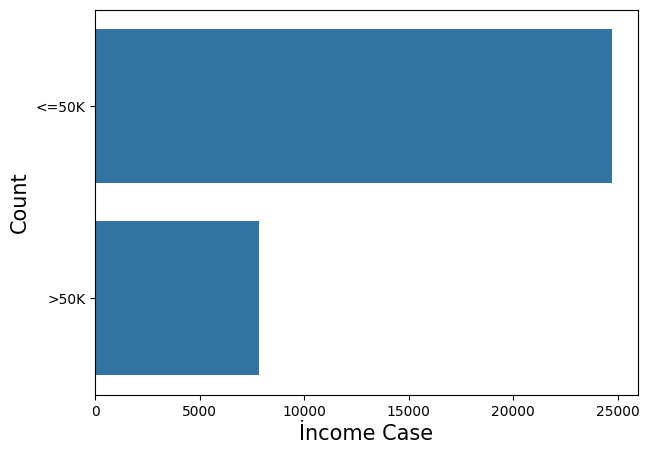

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(df["income"])
plt.xlabel("İncome Case",fontsize=15)
plt.ylabel("Count",fontsize=15)

Data Preparation

In [19]:
y = y.to_numpy()
X = X.to_numpy()

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split data into training and test data. Improvement: usually need validation data for hyperparameter tuning

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)# Fit only to the training data

# Now apply the transformations to both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Build MLP Model

Sigmoid Activation Function

In [20]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):

    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))

    return f

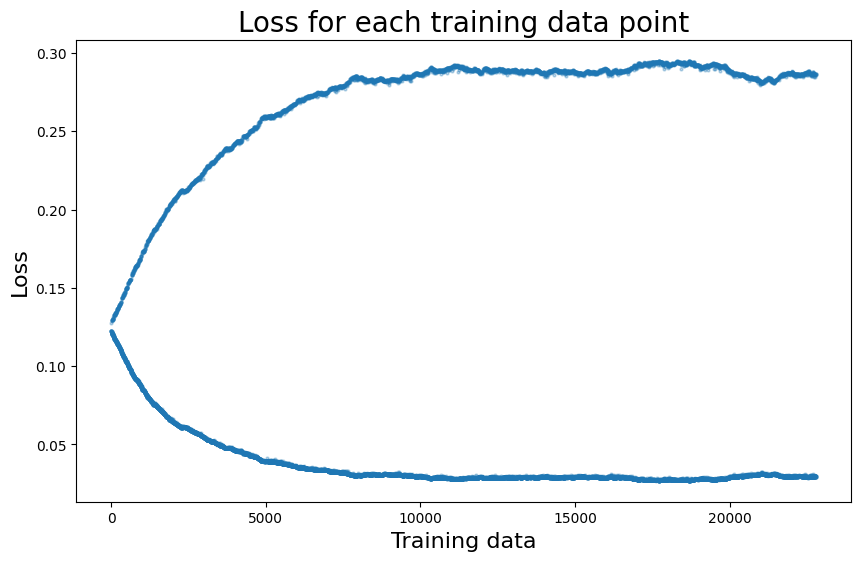

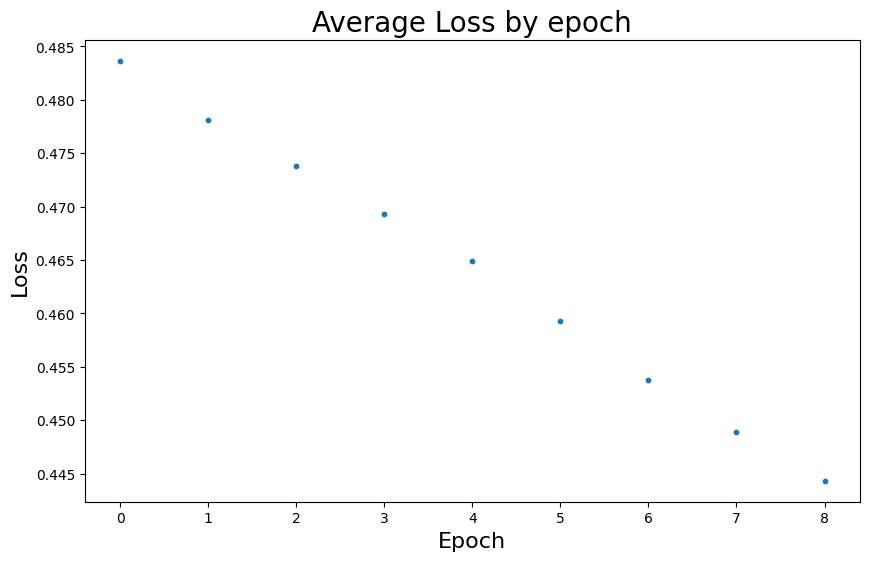

In [21]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:

    # 1: input the data
    x = X_train[I]


    # 2: Start the algorithm

    # 2.1: Feed forward
    z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1
    z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # output of the Output layer

    #2.2: Compute the output layer's error
    delta_Out =  (y - y_train[I]) * sigmoid_act(y, der=True)

    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * sigmoid_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * sigmoid_act(z1, der=True) # First Layer Error

    # 3: Gradient descent
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out

    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2

    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1

    # 4. Computation of the loss function
    mu.append((1/2)*(y-y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)


plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Average Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

Compute prediciton

In [22]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    pred = []

    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data
        x = X_test[I]

        # 2.1: Feed forward
        z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1
        z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )


    return np.array(pred);

In [23]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

In [24]:
from sklearn.metrics import accuracy_score

# Plot the confusion matrix
"""
cm = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()
"""

accuracy = accuracy_score(y_test, predictions)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.7542225406899375
